[[0.64833882 0.35166118]]
0.875


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


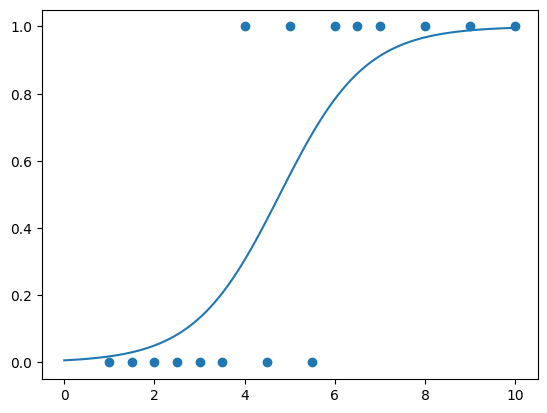

In [ ]:
# ## Question 1: The Basics & The Sigmoid Curve
# We want to predict whether a student will pass or fail an exam based on the number of hours they studied.

# Dataset:

# Python

# import pandas as pd

# data1 = {
#     'Hours_Studied': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10],
#     'Passed_Exam':   [0, 0,   0, 0,   0, 0,   1, 0,   1, 0,   1, 1,   1, 1, 1, 1]  # 0 = Fail, 1 = Pass
# }
# df1 = pd.DataFrame(data1)
# Your Tasks:

# Prepare Data: Define your feature X (Hours_Studied) and target Y (Passed_Exam).

# Build and Train: Import LogisticRegression from sklearn.linear_model, create an instance, and fit it to your data.

# Get Probabilities: Use the .predict_proba() method to predict the probabilities for a student who studied for 4.2 hours. What is the predicted probability of passing?

# Get Class Prediction: Use the .predict() method to predict the class (0 or 1) for a student who studied for 2.1 hours.

# Calculate Accuracy: Import accuracy_score from sklearn.metrics. Calculate the accuracy of your model on the entire training data.

# Visualize (Optional but Recommended):

# Create a scatter plot of Hours_Studied vs. Passed_Exam.

# To see the "S-curve" (sigmoid), plot the model's predicted probabilities across a range of hours (e.g., from 0 to 10).


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data1 = {
    'Hours_Studied': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10],
    'Passed_Exam':   [0, 0,   0, 0,   0, 0,   1, 0,   1, 0,   1, 1,   1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}
df = pd.DataFrame(data1)
# display(df)


x = df[['Hours_Studied']]
y = df['Passed_Exam']

model = LogisticRegression()

model.fit(x,y)


print(model.predict_proba([[4.2]])) #probability of passing is 0.64833882 or 64.83% and probability of failing is 0.35166118 or 35.16%

model.predict([[2.1]]) # probability of passing when studied 2.1 hours is 0%
y_pred = model.predict(x)

print(accuracy_score(y,y_pred))


plt.scatter(x,y)
x_sigmoid = np.linspace(0, 10, 100).reshape(-1,1)
y_sigmoid = model.predict_proba(x_sigmoid)
plt.plot(x_sigmoid,y_sigmoid[:,1])
plt.show();

,Age,Blood_Test_Value,Has_Disease
0,25,1.1,0
1,30,1.3,0
2,35,1.0,0
3,40,1.8,0
4,45,2.5,1
5,50,1.9,0
6,55,2.9,1
7,60,3.5,1
8,65,4.0,1
9,70,4.2,1


[0 0 0 0 0 0 1 1 1 1 1 1]
0.8333333333333334
[[5 1]
 [1 5]]


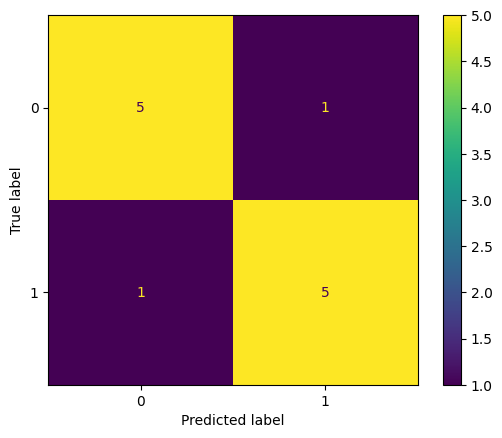

0.8333333333333334
0.8333333333333334


In [57]:
# ## Question 2: The Confusion Matrix (Precision & Recall)
# A hospital wants to build a simple model to predict if a patient has a certain disease based on their age and the result of a single blood test. "1" means they have the disease.

# Dataset:

# Python

# import pandas as pd

# data2 = {
#     'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
#     'Blood_Test_Value': [1.1, 1.3, 1.0, 1.8, 2.5, 1.9, 2.9, 3.5, 4.0, 4.2, 4.1, 4.8],
#     'Has_Disease': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] # 0 = No Disease, 1 = Has Disease
# }
# df2 = pd.DataFrame(data2)
# Your Tasks:

# Build Model: Define X (using both 'Age' and 'Blood_Test_Value') and Y. Train a LogisticRegression model.

# Get Predictions: Get the model's class predictions (y_pred) for the training data.

# Calculate Accuracy: What is the model's accuracy?

# The Confusion Matrix:

# Import and print the confusion_matrix from sklearn.metrics.

# Based on the matrix, how many patients were:

# Correctly predicted as "No Disease" (True Negatives)?

# Incorrectly predicted as "Has Disease" (False Positives)?

# Incorrectly predicted as "No Disease" (False Negatives)?

# Correctly predicted as "Has Disease" (True Positives)?

# Calculate Precision & Recall:

# Import and print the precision_score and recall_score.

# Interpret: In your own words, what is the difference between this model's precision and its recall? (Hint: Think about what "False Positive" vs. "False Negative" means in a medical context).
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import matplotlib.pyplot as plt


data2 = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
    'Blood_Test_Value': [1.1, 1.3, 1.0, 1.8, 2.5, 1.9, 2.9, 3.5, 4.0, 4.2, 4.1, 4.8],
    'Has_Disease': [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1] # 0 = No Disease, 1 = Has Disease
}
df = pd.DataFrame(data2)
display(df)

model = LogisticRegression()

x = df[['Age','Blood_Test_Value']]
y = df['Has_Disease']

model.fit(x,y)

y_pred = model.predict(x)
print(y_pred)
print(accuracy_score(y,y_pred))


confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show();


# Correctly predicted as "No Disease" (True Negatives)? - 5 True Negatives

# Incorrectly predicted as "Has Disease" (False Positives)? 1 False Positive

# Incorrectly predicted as "No Disease" (False Negatives)? - 1 False Negative

# Correctly predicted as "Has Disease" (True Positives)? - 5 True Positives

print(precision_score(y,y_pred))
print(recall_score(y,y_pred))

# by reading the precision score - When the model predicts a patient has the disease, it is correct 83.3% of the time. (True Positives / All Predicted Positives   TP/(TP+FP)) 
# and recall score  i can say that out of all the patients who actually have the disease, the model successfully found 83.3% of them (True Positives / All Actual Positives TP/(TP+FN))